In [4]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn
%matplotlib inline
from __future__ import division
import pprint
from collections import Counter

In [5]:
GP_peptides = 'CW5-162Trypsin_GP_peptides.xlsx'
GP_proteins = 'CW5-162Trypsin_GP_proteins.xlsx'
WP = 'CW5-162Trypsin_wholeP_protein.xlsx'
glycopeptide = 'CW5-162Trysin_Glycan_ByonicPeptides.xlsx'
glycopeptide_GPFasta = 'CW5-162Trypsin_Glycan_GPFasta.xlsx'
phosphopeptide = 'CW5-162Trypsin_Phospho_Byonic_Peptides.xlsx'
chartpattern = 'CW5-162TrypsinGlycan_ChartPattern.xlsx'

In [6]:
#### Whole Protein analysis on peptide level ####

In [7]:
dfwp = pd.read_excel(WP,sheetname='Sheet1' )

In [8]:
dfwp.head(1)

,Accession,Description,ΣCoverage,Σ# Proteins,Σ# Unique Peptides,Σ# Peptides,Σ# PSMs,A8: Area,B8: Area,C8: Area,...,"Coverage E(2,4)","# Peptides E(2,4)","# PSM E(2,4)","Score F(2,4)","Coverage F(2,4)","# Peptides F(2,4)","# PSM F(2,4)",# AAs,MW [kDa],calc. pI
0,Q9H299,SH3 domain-binding glutamic acid-rich-like pro...,81.72,2,6,7,52,77568185.575521,23749210.695312,26070118.109375,...,66.67,6,8,12.064787,81.72,10,10,93,10.431265,4.932129


In [9]:
#dfwp1 = dfwp[['Accession', 'Description', 'A8: Area', 'B8: Area', 'C8: Area', 'Gene Name', 'GO Ontology']]
#dfwp1.columns = ['Accession', 'Description', 'control area', 'anti328 area', 'PMAI area', 'Gene Name', 'GO ontology']
dfwp1 = dfwp[['Accession', 'Description', 'A8: Area', 'B8: Area', 'C8: Area', 'D8: Area', 'E8: Area', 'F8: Area']]
dfwp1.columns = ['Accession', 'Description', '15miso area', '15manti area', '6hiso area' , '6hanti area', '18hiso area','18hanti area']

In [10]:
dfwp2 = dfwp1.replace(0,np.nan)
dfwp2 = dfwp1.replace(0,1)
dfwp2['wp_15manti_div_15miso'] =  np.log2(dfwp2['15manti area'] / dfwp2['15miso area'] )
dfwp2['wp_6hanti_div_6hiso'] = np.log2(dfwp2['6hanti area'] / dfwp2['6hiso area'])
dfwp2['wp_18hanti_div_18hiso'] = np.log2(dfwp2['18hanti area'] / dfwp2['18hiso area'])

if 'Accession' in dfwp2.columns:
    dfwp2.rename(columns={'Accession':'Protein Group Accessions'}, inplace=True)
dfwp2 = dfwp2.set_index(['Protein Group Accessions'])

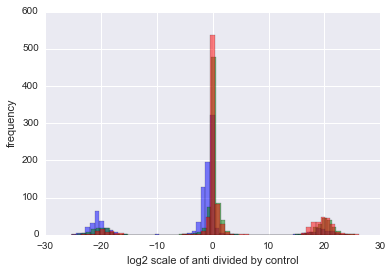

In [11]:
#ratio between anti and control, blue = 15m, green = 6h, red = 18h
dfwp2['wp_15manti_div_15miso'].hist(bins=60, alpha = 0.5, color = 'b')
dfwp2['wp_6hanti_div_6hiso'].hist(bins=60, alpha = 0.5, color = 'g')
dfwp2['wp_18hanti_div_18hiso'].hist(bins=60, alpha = 0.5, color = 'r')
plt.xlabel('log2 scale of anti divided by control')
plt.ylabel('frequency')

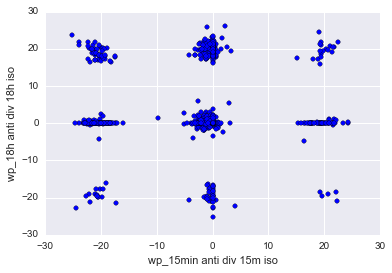

In [12]:
plt.scatter(dfwp2['wp_15manti_div_15miso'], dfwp2['wp_18hanti_div_18hiso'])
plt.xlabel('wp_15min anti div 15m iso')
plt.ylabel('wp_18h anti div 18h iso')

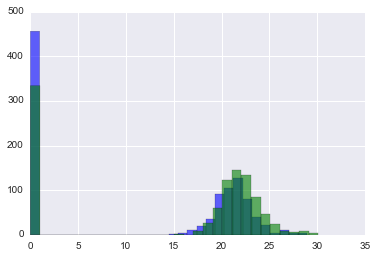

In [13]:
#raw area values between 15 anti (blue) and 15 iso (green)

np.log2(dfwp2['15manti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfwp2['15miso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

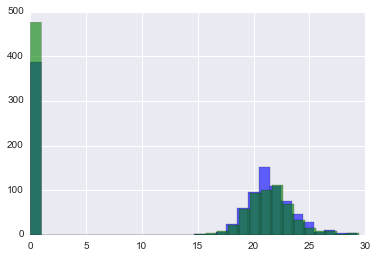

In [14]:
#6h anti in blue and 6h iso in green
np.log2(dfwp2['6hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfwp2['6hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

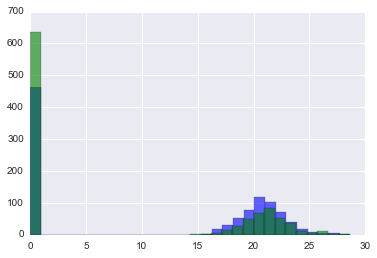

In [15]:
#18h anti in blue and 18h iso in green
np.log2(dfwp2['18hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfwp2['18hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

In [16]:
#### Glycoprotein level analysis, first on protein then on peptide level ####

In [17]:
dfGP = pd.read_excel(GP_proteins,sheetname='Sheet1')

In [18]:
dfGP1 = dfGP[['Accession', 'Description', 'A8: Area', 'B8: Area', 'C8: Area', 'D8: Area', 'E8: Area', 'F8: Area']]
dfGP1.columns = ['Accession', 'Description', '15miso area', '15manti area', '6hiso area' , '6hanti area', '18hiso area','18hanti area']

In [19]:
dfGP2 = dfGP1.replace(0,np.nan)
dfGP2 = dfGP1.replace(0,1)
dfGP2['GP_15manti_div_15miso'] =  np.log2(dfGP2['15manti area'] / dfGP2['15miso area'] )
dfGP2['GP_6hanti_div_6hiso'] = np.log2(dfGP2['6hanti area'] / dfGP2['6hiso area'])
dfGP2['GP_18hanti_div_18hiso'] = np.log2(dfGP2['18hanti area'] / dfGP2['18hiso area'])

if 'Accession' in dfGP2.columns:
    dfGP2.rename(columns={'Accession':'Protein Group Accessions'}, inplace=True)
dfGP2 = dfGP2.set_index(['Protein Group Accessions'])

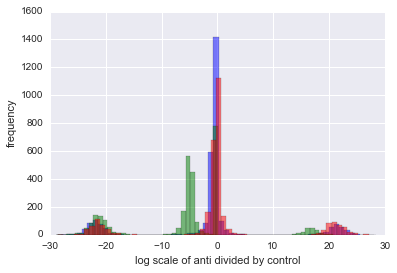

In [20]:
#ratio between anti and control, blue = 15m, green = 6h, red = 18h
dfGP2['GP_15manti_div_15miso'].hist(bins=60, alpha = 0.5, color = 'b')
dfGP2['GP_6hanti_div_6hiso'].hist(bins=60, alpha = 0.5, color = 'g')
dfGP2['GP_18hanti_div_18hiso'].hist(bins=60, alpha = 0.5, color = 'r')
plt.xlabel('log scale of anti divided by control')
plt.ylabel('frequency')

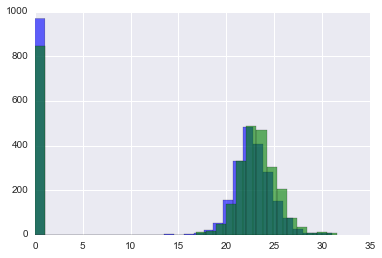

In [106]:
#raw area values between 15m anti (blue) and 15m iso (green)

np.log2(dfGP2['15manti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfGP2['15miso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

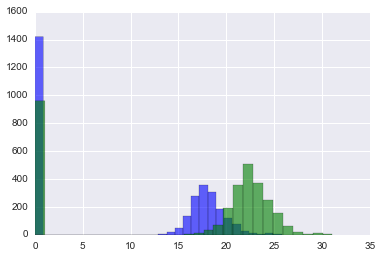

In [105]:
#6h anti in blue and 6h iso in green
np.log2(dfGP2['6hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfGP2['6hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

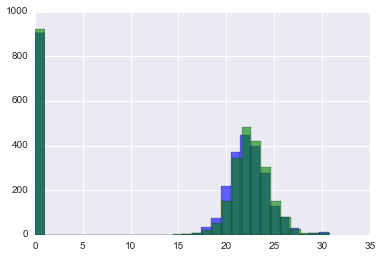

In [107]:
#18h anti in blue and 18h iso in green
np.log2(dfGP2['18hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfGP2['18hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

In [24]:
dfGP_pep = pd.read_excel(GP_peptides,sheetname='Sheet1' )

In [25]:
dfGP_pep.head(1)

,A2,A4,B2,B4,C2,C4,D2,D4,E2,E4,...,Charge,m/z [Da],MH+ [Da],ΔM [ppm],RT [min],First Scan,Last Scan,MS Order,Ions Matched,Spectrum File
0,NaN,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,908.464844,2723.379978,-4.480939,104.137495,29495,29495,MS2,0/0,5162_15m_iso_trypsin_GP.raw


In [26]:
#testing out the apply method to remove accessions after the semicolon
#pd.concat([df['Protein Group Accessions'], df['Protein Group Accessions'].apply(lambda x: str(x).split(';')[0])],axis=1)
dfGP_pep['Protein Group Accessions'] = dfGP_pep['Protein Group Accessions'].apply(lambda x: str(x).split(';')[0])
#some Protein Group Accessions have multiples. choose the first one only

df_filtered = dfGP_pep[['Sequence','Protein Group Accessions','Precursor Area','Spectrum File']]

In [27]:
f = {'Precursor Area':['count','sum','mean']}
dfGP_pep_group = df_filtered.groupby(['Spectrum File','Protein Group Accessions']).agg(f)

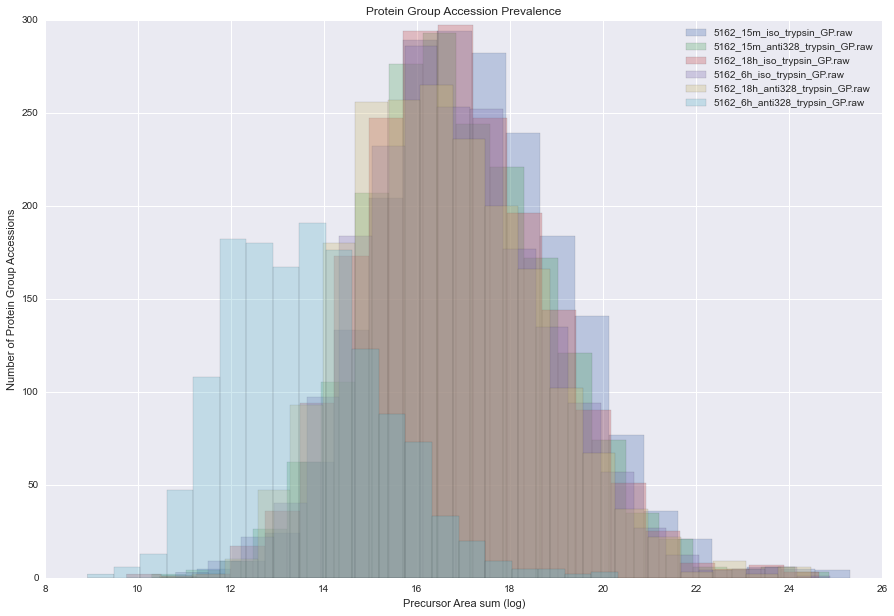

In [28]:
for val, spectrum_file in enumerate(dfGP_pep['Spectrum File'].unique()):
    np.log(dfGP_pep_group.loc[spectrum_file].iloc[:,1]).hist(bins = 20, alpha = 0.3, figsize = (15,10), label = spectrum_file)
plt.legend()
plt.title('Protein Group Accession Prevalence')
plt.xlabel('Precursor Area sum (log)')
plt.ylabel('Number of Protein Group Accessions')


In [29]:
#### GLYCOPEPTIDE ANALYSIS ####

In [30]:
dfgp = pd.read_excel(glycopeptide,sheetname='Sheet1')
dfgp_GPFasta = pd.read_excel(glycopeptide_GPFasta,sheetname='Sheet1')

In [31]:
dfgp['Spectrum File'].unique()

array([u'5162_6h_iso_trypsin_glycan_include.raw',
       u'5162_18h_iso_trypsin_glycan_scouting.raw',
       u'5162_6h_iso_trypsin_glycan.raw',
       u'5162_15m_iso_trypsin_glycan_include.raw',
       u'5162_15m_anti328_trypsin_glycan.raw',
       u'5162_15m_iso_trypsin_glycan_scouting.raw',
       u'5162_18h_anti328_trypsin_glycan_include.raw',
       u'5162_18h_anti328_trypsin_glycan_scouting.raw',
       u'5162_15m_anti328_trypsin_glycan_include_150716180610.raw',
       u'5162_18h_iso_trypsin_glycan_include.raw',
       u'5162_6h_anti328_trypsin_glycan_include.raw',
       u'5162_6h_anti328_trypsin_glycan_scouting.raw'], dtype=object)

In [32]:
original = dfgp['Spectrum File'].unique()
new = ['1_6hiso','0_18hiso', '0_6hiso', '1_15miso', '0_15manti', '0_15miso', '1_18hanti', '0_18hanti','1_15manti','1_18hiso','1_6hanti','0_6hanti']

#changing the Spectrum File name into something sensible
if dfgp['Spectrum File'][0] not in  new:
    alias = {original[idx]:new[idx] for idx in range(len(original))}
    dfgp = dfgp.replace({'Spectrum File': alias})

In [33]:
#replace nan with no value. shows that the sequence was picked up, but wasn't assigned a value
dfgp['Precursor Area'] = dfgp['Precursor Area'].replace(np.nan, 1)

In [34]:
#Splitting Spectrum File into Trial (e.g. PMAI, or, control) and Version (1,2,3)
#deprecated function
#dfgp = dfgp.join(pd.DataFrame(dfgp['Spectrum File'].str.split('_',1).tolist(),columns = ['Trial','Version']))

dfgp['Trial'] = dfgp['Spectrum File'].str[0]
dfgp['Version'] = dfgp['Spectrum File'].str[2:]

In [35]:
#create a dataframe, where sequence is not case sensitive
dfgp['Sequence'] = dfgp['Sequence'].str.upper()

In [108]:
def ratios(dfgp):
    dfgp_15miso = dfgp[dfgp['Version'] == '15miso']
    iso1_bytrial = dfgp_15miso.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_15manti = dfgp[dfgp['Version'] == '15manti']
    anti1_bytrial = dfgp_15manti.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_6hiso = dfgp[dfgp['Version'] == '6hiso']
    iso2_bytrial = dfgp_6hiso.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')
    
    dfgp_6hanti = dfgp[dfgp['Version'] == '6hanti']
    anti2_bytrial = dfgp_6hanti.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')
    
    dfgp_18hiso = dfgp[dfgp['Version'] == '18hiso']
    iso3_bytrial = dfgp_18hiso.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_18hanti = dfgp[dfgp['Version'] == '18hanti']
    anti3_bytrial = dfgp_18hanti.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    return (anti1_bytrial / iso1_bytrial), (anti2_bytrial / iso2_bytrial), (anti3_bytrial / iso3_bytrial), np.log2(anti1_bytrial / iso1_bytrial), np.log2(anti2_bytrial / iso2_bytrial), np.log2(anti3_bytrial / iso3_bytrial)

In [37]:
#format the pivot tables
pd.options.display.float_format = '{:.2f}'.format

In [38]:
#dfgp2 is the index for glycan only sequences
dfgp2 = dfgp[dfgp['Glycan composition'].notnull()]

In [39]:
# number of HexNAz2Si unique sequences in the file
len(dfgp2['Sequence'].unique())

501

In [40]:
#glycan only peptides showing here
f = {'Precursor Area':['count','sum','mean']}
dfgp2.groupby(['Spectrum File','Sequence']).agg(f).head()

Precursor Area              \
                                                    count         sum   
Spectrum File Sequence                                                  
0_15manti     AAASLAAVSGTAAASLGSAQPTDLGAHK              2  5446913.06   
              AALTQQHPPVTNGDTVK                         2   765618.00   
              AANIVIQTEPPVPVSINSNITR                    4 20564143.00   
              ADRPSLEKPEPIHLSVSTPVTQGGTVK               4 17669053.81   
              AETQGANHTPVISAHQTR                        4        4.00   

                                                       
                                                 mean  
Spectrum File Sequence                                 
0_15manti     AAASLAAVSGTAAASLGSAQPTDLGAHK 2723456.53  
              AALTQQHPPVTNGDTVK             382809.00  
              AANIVIQTEPPVPVSINSNITR       5141035.75  
              ADRPSLEKPEPIHLSVSTPVTQGGTVK  4417263.45  
              AETQGANHTPVISAHQTR                 1.00

In [41]:
dfgp2['Spectrum File'].unique()

array(['1_6hiso', '1_15miso', '0_15manti', '1_15manti', '1_18hiso',
       '0_6hiso', '0_18hiso', '0_15miso', '1_18hanti', '0_18hanti',
       '0_6hanti', '1_6hanti'], dtype=object)

In [42]:
# the p_c_ratio, o_c_ratio, p_c_logratio, and o_c_logratio are only on hexnaz2si filtered glycopeptides
#p_c_ratio, o_c_ratio, p_c_logratio, o_c_logratio =  ratios(dfgp)

ratio_15m, ratio_6h, logratio_18h, logratio_15m, logratio_6h, logratio_18h =  ratios(dfgp2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1168f02d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11698f910>]], dtype=object)

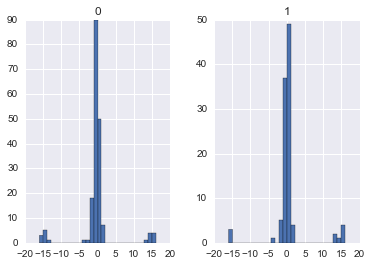

In [43]:
logratio_15m.hist(bins=30, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ac83a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116cc8ad0>]], dtype=object)

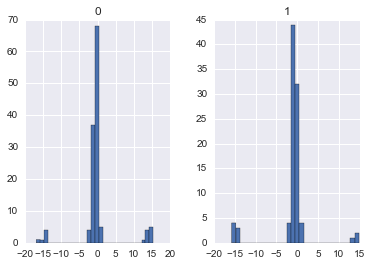

In [44]:
logratio_18h.hist(bins=30, )

In [45]:
#glycosylated sequences from all four trials in a pivot
group2_pivot = dfgp2.pivot_table(values='Precursor Area',index=['Protein Group Accessions'],columns=['Version'], aggfunc='sum')

In [46]:
group2_pivot.columns

Index([u'15manti', u'15miso', u'18hanti', u'18hiso', u'6hanti', u'6hiso'], dtype='object', name=u'Version')

In [47]:
ratio_15m = np.log2(group2_pivot.iloc[:,0]/ group2_pivot.iloc[:,1])
ratio_6h = np.log2(group2_pivot.iloc[:,4]/ group2_pivot.iloc[:,5])
ratio_18h = np.log2(group2_pivot.iloc[:,2]/ group2_pivot.iloc[:,3])

In [48]:
group3_pivot = group2_pivot.copy()
group3_pivot['glycan_ratio_15m'] = ratio_15m
group3_pivot['glycan_ratio_6h'] = ratio_6h
group3_pivot['glycan_ratio_18h'] = ratio_18h

In [49]:
group3_pivot.to_excel('group3_pivot.xlsx')

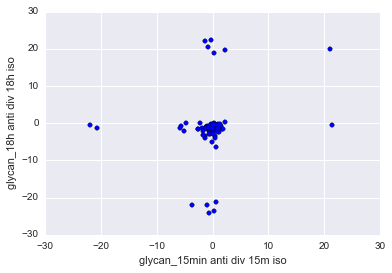

In [116]:
plt.scatter(group3_pivot['glycan_ratio_15m'], group3_pivot['glycan_ratio_18h'])
plt.xlabel('glycan_15min anti div 15m iso')
plt.ylabel('glycan_18h anti div 18h iso')

In [50]:
#### PHOSPHOPEPTIDE ANALYSIS ####

In [51]:
dfphos = pd.read_excel(phosphopeptide,sheetname='Sheet1')

In [52]:
dfphos2 = dfphos[dfphos.Modifications.str.contains('Phospho') == True]

In [53]:
dfphos2 = dfphos2[['Sequence', 'Protein Group Accessions', 'Precursor Area','Spectrum File','Modifications']]

In [54]:
#dfphos2['Spectrum File'].str.split('_').tolist()
timesplit = lambda x: x.split('_')[1]
dfphos2['Time'] = dfphos2['Spectrum File'].apply(timesplit)

treatmentsplit = lambda x: x.split('_')[2]
dfphos2['Treatment'] = dfphos2['Spectrum File'].apply(treatmentsplit)

dfphos2['Sequence'] =  dfphos2['Sequence'].str.upper()

In [55]:
dfphos2_pivot = dfphos2.pivot_table(values='Precursor Area', index=['Protein Group Accessions'], columns = ['Treatment','Time'])

In [56]:
dfphos2_pivot.columns

MultiIndex(levels=[[u'anti328', u'iso'], [u'15m', u'18h', u'6h']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[u'Treatment', u'Time'])

In [57]:
#replacing missing with 1, to avoid div by zero errors
dfphos2_pivot = dfphos2_pivot.replace(np.nan,1)

In [58]:
dfphos2_ratios = np.log2(np.divide(dfphos2_pivot.iloc[:,dfphos2_pivot.columns.get_level_values('Treatment') == 'anti328'] ,dfphos2_pivot.iloc[:,dfphos2_pivot.columns.get_level_values('Treatment') == 'iso']))

In [59]:
dfphos2_ratios.columns = ['phos_anti_div_iso_15m','phos_anti_div_iso_18h','phos_anti_div_iso_6h']

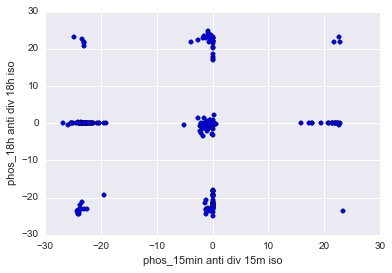

In [117]:
plt.scatter(dfphos2_ratios['phos_anti_div_iso_15m'], dfphos2_ratios['phos_anti_div_iso_18h'])
plt.xlabel('phos_15min anti div 15m iso')
plt.ylabel('phos_18h anti div 18h iso')

In [ ]:
#### COMBINE ALL DATA INTO ONE HEAT PLOT ####

In [109]:
#preparing the 4 dataframe to merge by accession
dfphos_formatted = dfphos2_ratios
dfwp_formatted = dfwp2[['wp_15manti_div_15miso','wp_6hanti_div_6hiso', 'wp_18hanti_div_18hiso']]
dfGP_formatted = dfGP2[['GP_15manti_div_15miso','GP_6hanti_div_6hiso','GP_18hanti_div_18hiso']]
glycan_formatted = group3_pivot[['glycan_ratio_15m','glycan_ratio_6h','glycan_ratio_18h']]

In [110]:
df_merged = dfphos_formatted.join( dfwp_formatted, how='outer')
df_merged = df_merged.join(dfGP_formatted, how= 'outer')
df_merged = df_merged.join(glycan_formatted, how= 'outer')

In [111]:
df_merged['sum'] = df_merged.sum(1)
df_mergedsort = df_merged.sort(columns='sum', ascending= False)

In [113]:
df_merged.max()

phos_anti_div_iso_15m    23.31
phos_anti_div_iso_18h    24.69
phos_anti_div_iso_6h     25.47
wp_15manti_div_15miso    24.32
wp_6hanti_div_6hiso      25.45
wp_18hanti_div_18hiso    26.19
GP_15manti_div_15miso    28.39
GP_6hanti_div_6hiso      20.74
GP_18hanti_div_18hiso    28.03
glycan_ratio_15m         21.93
glycan_ratio_6h         -11.29
glycan_ratio_18h         22.35
sum                      86.87
dtype: float64

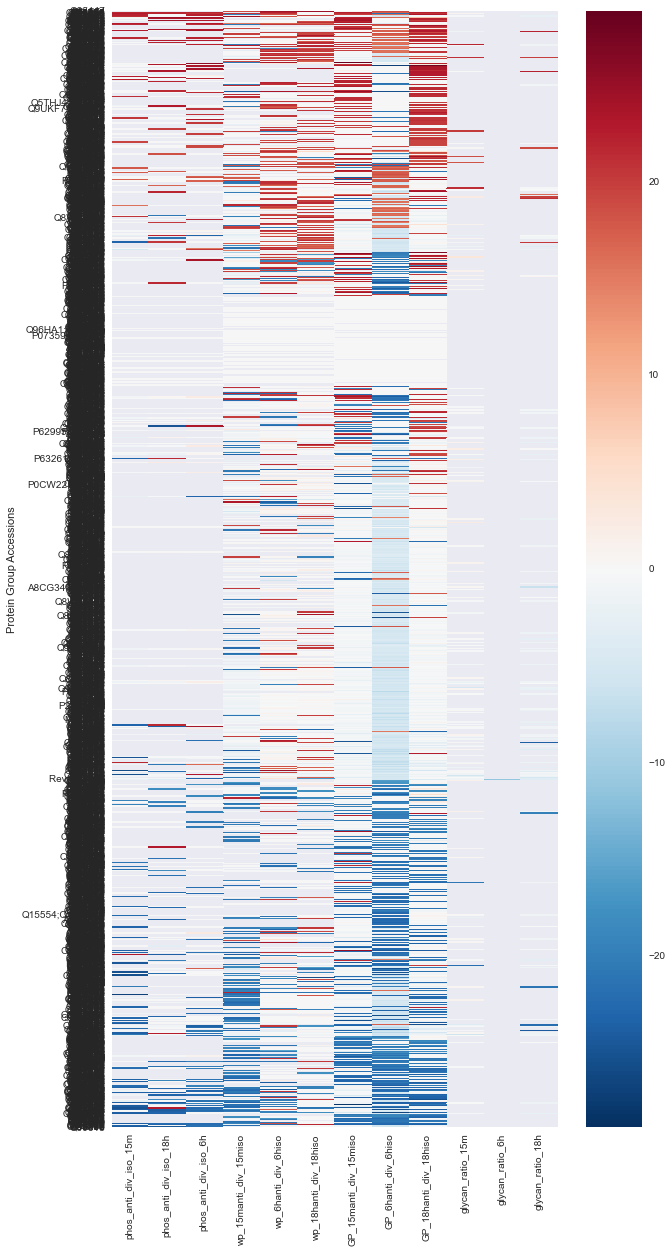

In [114]:
plt.figure(figsize=(10, 20))
seaborn.heatmap(df_mergedsort.iloc[:,:-1], xticklabels=True, yticklabels=True)



In [66]:
#### Chart Pattern Analysis Belowc ####

In [67]:
cp = pd.read_excel(chartpattern,sheetname='Sheet1' )

In [68]:
cp.head(1)

,File Name,#,m/z,z,scan start,scan end,scan range,time,matches,amplitude,score
0,15m_iso_0,1,484.20,2,3661,3785,125,2102,24,5911379,110.20


In [69]:
cp2 = cp.copy()
cp2 = cp2.sort('score', ascending=False)
cp2 = cp2.reset_index()

#adding columns to initial data
cp2['m'] = cp2['m/z'] * cp2['z']
cp2['Version'] = cp2['File Name'].str[-1]
cp2['Trial'] = cp2['File Name'].str[:-2]
#old code to split File name into Version and Trial
#cp2 = cp2.join(pd.DataFrame(cp2['File name'].str.split('_',1).tolist(),columns = ['Trial','Version']))

#Christina's set conversion from scanrange to seconds
scanrange_to_time = 0.5
cp2['scan range (seconds)'] = scanrange_to_time * cp2['scan range']
cp2['time start'] = cp2['time'] - cp2['scan range (seconds)']
cp2['time end'] = cp2['time'] + cp2['scan range (seconds)']

cp2['Version'] = cp2['Version'].astype(int)


In [70]:
mz_limit = 0.01
score_floor = 50
cluster = []
cluster_file = []
agg_amplitude = np.zeros(cp2.shape[0])
agg_index = np.zeros(cp2.shape[0])
agg_index.fill(-1)
exceptions = []

for row in range(cp2.shape[0]):
    if row % 1000 == 0:
        print 'processing row {}'.format(row)
    mz_mask = np.abs(cp2['m/z'] - cp2.loc[row, 'm/z']) <= mz_limit
    z_mask = cp2['z'] == cp2.loc[row, 'z']
    scan_mask = (cp2['time start'] <= cp2.loc[row, 'time end']) | (cp2['time end'] >= cp2.loc[row, 'time start'])
    score_mask = cp2['score'] >= score_floor
    file_mask = cp2['File Name'] == cp2.loc[row, 'File Name']
    
    cluster_mask = (mz_mask & z_mask & scan_mask & score_mask)
    cluster_file_mask = (mz_mask & z_mask & scan_mask & score_mask & file_mask)
    
    cluster.append(cp2.index[cluster_mask].tolist())
    cluster_file.append(cp2.index[cluster_file_mask].tolist())
    
    #agg_index only calculates based off of cluster, which is conditioned from the 4 masks above
    if cluster_file[row]:
        if cluster_file[row][0] == row:
            agg_index[row] = cluster[-1][0]
            agg_amplitude[row] = cp2.ix[cluster_file[row],'amplitude'].sum()
    else:
        exceptions.append(row)
        #print cp2.loc[row, 'm/z'], cp2.loc[row, 'z'], cp2.loc[row, 'time end'], cp2.loc[row, 'time start']

processing row 0
processing row 1000
processing row 2000
processing row 3000
processing row 4000
processing row 5000
processing row 6000
processing row 7000
processing row 8000
processing row 9000
processing row 10000
processing row 11000
processing row 12000
processing row 13000
processing row 14000
processing row 15000
processing row 16000
processing row 17000
processing row 18000
processing row 19000
processing row 20000
processing row 21000
processing row 22000
processing row 23000
processing row 24000
processing row 25000
processing row 26000
processing row 27000
processing row 28000


In [71]:
cp2['agg_amplitude'] = agg_amplitude
cp2['agg_index'] = agg_index
cp2['cluster'] = cluster
cp2['cluster_file'] = cluster_file
cp2['cluster_len'] = [len(row) for row in cp2['cluster']]

In [72]:
cp2.columns

Index([               u'index',            u'File Name',
                          u'#',                  u'm/z',
                          u'z',           u'scan start',
                   u'scan end',           u'scan range',
                       u'time',              u'matches',
                  u'amplitude',                u'score',
                          u'm',              u'Version',
                      u'Trial', u'scan range (seconds)',
                 u'time start',             u'time end',
              u'agg_amplitude',            u'agg_index',
                    u'cluster',         u'cluster_file',
                u'cluster_len'],
      dtype='object')

In [73]:
Counter(cp2['cluster_len'])

Counter({0: 14711, 1: 2516, 2: 1741, 10: 1565, 3: 1271, 4: 1093, 5: 825, 7: 821, 9: 773, 6: 653, 8: 600, 11: 430, 12: 357, 16: 204, 13: 195, 21: 161, 19: 120, 18: 109, 15: 108, 14: 97, 23: 64, 28: 57, 42: 56, 17: 49, 20: 37, 32: 35, 26: 26, 31: 11})

In [74]:
#checking that the cluster groups are consistent
#if row 10 cluster contains [10,21,48], that row 21 is also [10,21,48]
#found that it's largely true, 3160 of 3311 clusters are completely identical
#for non-identical, it's still not a major problem because comparisons of PMAI, or, control are still valid within the group
cp2['cluster_sum'] = [sum(row) for row in cp2['cluster']]
cp2.groupby(['agg_index','cluster_len']).count().to_excel('temp.xlsx')

In [75]:
cp2.Trial.unique()

array([u'15m_anti328', u'15m_iso', u'18h_anti328', u'18h_iso', u'6h_iso',
       u'6h_anti328'], dtype=object)

In [76]:
cp2_pivot = cp2.pivot_table(values='amplitude', index='agg_index', columns=['Trial','Version'],aggfunc='sum')

In [77]:
#determine the minimum value to substitute for the nan values
cp2[cp2['agg_amplitude']>0].groupby('File Name').min()['amplitude']

File Name
15m_anti328_0    38539
15m_anti328_1    25042
15m_iso_0        25042
15m_iso_1        14288
18h_anti328_0    42512
18h_anti328_1    32750
18h_iso_0        18184
18h_iso_1        21498
6h_anti328_0     94056
6h_anti328_1     13412
6h_iso_0         12755
6h_iso_1         26046
Name: amplitude, dtype: int64

In [78]:
#nan are undetectable amplitudes. setting to a minimum threshhold of 10,000
min_ampliltude = 1
cp3_pivot = cp2_pivot.fillna(min_ampliltude)

In [79]:
one = cp3_pivot.iloc[:,0:2]
two = cp3_pivot.iloc[:,2:4]
three = cp3_pivot.iloc[:,4:6]
four = cp3_pivot.iloc[:,6:8]
five = cp3_pivot.iloc[:,8:10]
six = cp3_pivot.iloc[:,10:12]

#hacky way to divide one column label with another
one_two_label = pd.MultiIndex(levels=[['15m'],[0,1]], labels=[[0,0], [0,1]], names=[u'Version', u'Trial'])
one_two = pd.DataFrame(data=(one.values / two.values),columns= one_two_label, index=cp3_pivot.index)

three_four_label = pd.MultiIndex(levels=[['18h'],[0,1]], labels=[[0,0], [0,1]], names=[u'Version', u'Trial'])
three_four = pd.DataFrame(data=(three.values / four.values), columns = three_four_label, index=cp3_pivot.index)

five_six_label = pd.MultiIndex(levels=[['6h'],[0,1]], labels=[[0,0], [0,1]], names=[u'Version', u'Trial'])
five_six = pd.DataFrame(data=(five.values / six.values),columns= five_six_label, index=cp3_pivot.index)

In [80]:
cp3_chg = pd.concat([one_two, three_four, five_six], axis=1).iloc[1:]

In [81]:
pd.concat([(cp3_chg < 1).sum(),(cp3_chg == 1).sum(),(cp3_chg > 1).sum()],axis=1)
# 0 means numerator < denominator
# 1 means numerator = denominator
# 2 means numerator > denominator

0    1    2
Version Trial               
15m     0      203  488  631
        1      307  538  477
18h     0      533  592  197
        1      492  683  147
6h      0      579  725   18
        1      513  789   20

In [82]:
#exact ratio of 1 means both numerator and denominator were NaN
cp3_chg = cp3_chg.replace(1,np.nan)

In [83]:
#this shows one specific group
cp2[cp2['agg_index'] == 14].sort('File Name').iloc[:,:-3]

,index,File Name,#,m/z,z,scan start,scan end,scan range,time,matches,...,score,m,Version,Trial,scan range (seconds),time start,time end,agg_amplitude,agg_index,cluster


In [84]:
#ratio between treatments
#log centers no change around zero, and makes the increase and decrease distribution roughly symmetrical
#without the log transform, the distribution of ratio is around 0, decrease is between 0 and 1, and increase
#is 1 to infinity

cp3_logchg = np.log(cp3_chg)
cp3_logchg.head()

Version     15m         18h           6h       
Trial         0     1     0     1      0      1
agg_index                                      
0.00       1.23  0.34 -0.03 -0.18 -17.57 -16.85
2.00       1.15  0.27 -0.20 -0.65 -16.59 -15.94
3.00      -0.33 -0.07  1.62 -0.24 -14.90 -15.80
7.00       0.31  0.09 -0.59 -0.73 -15.84 -15.49
11.00      0.39  0.23 -0.44 -0.41 -16.16 -15.83

In [85]:
cp4_logchg= cp3_logchg.copy()
levels = cp4_logchg.columns.levels
labels = cp4_logchg.columns.labels
cp4_logchg.columns = levels[0][labels[0]]

In [86]:
#count of groups that increase/decrease, across all 4 trials
cp4_summary = pd.concat( [(cp4_logchg < 0).stack().reset_index().groupby('Version').sum().iloc[:,1], (cp4_logchg > 0).stack().reset_index().groupby('Version').sum().iloc[:,1]], axis=1)
cp4_summary.columns = ['decrease','increase']
cp4_summary

,decrease,increase
Version,,
15m,510.00,1108.00
18h,1025.00,344.00
6h,1092.00,38.00


In [87]:
#once the treatments are in ratios, I can combine the 4 trials
#idiosyncratic factors cancel out
cp3_logchg_stack = pd.concat([
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='15m'].stack(),
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='18h'].stack(),
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='6h'].stack(),],axis=1)

In [88]:
cp3_logchg_stack.describe()

,15m,18h,6h
count,1618.00,1369.00,1130.00
mean,1.23,-2.16,-13.55
std,9.35,9.96,5.42
min,-16.64,-17.04,-19.12
25%,-0.26,-13.02,-15.59
50%,0.48,-0.61,-14.70
75%,11.94,0.01,-13.66
max,16.35,17.60,15.60


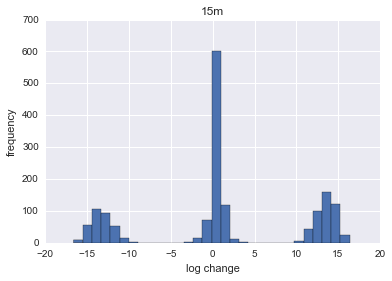

In [89]:
cp3_logchg_stack.iloc[:,0].hist( bins= 30)
plt.title(cp3_logchg_stack.columns[0])
plt.xlabel('log change')
plt.ylabel('frequency')

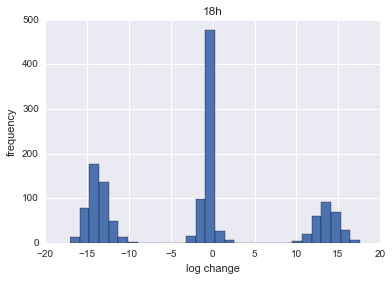

In [103]:
cp3_logchg_stack.iloc[:,1].hist( bins= 30)
plt.title(cp3_logchg_stack.columns[1])
plt.xlabel('log change')
plt.ylabel('frequency')

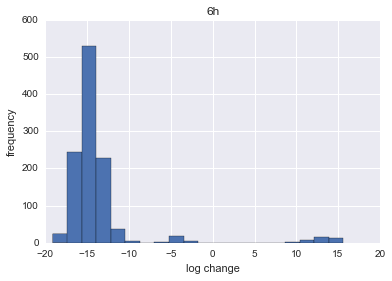

In [104]:
cp3_logchg_stack.iloc[:,2].hist( bins= 20)
plt.title(cp3_logchg_stack.columns[2])
plt.xlabel('log change')
plt.ylabel('frequency')

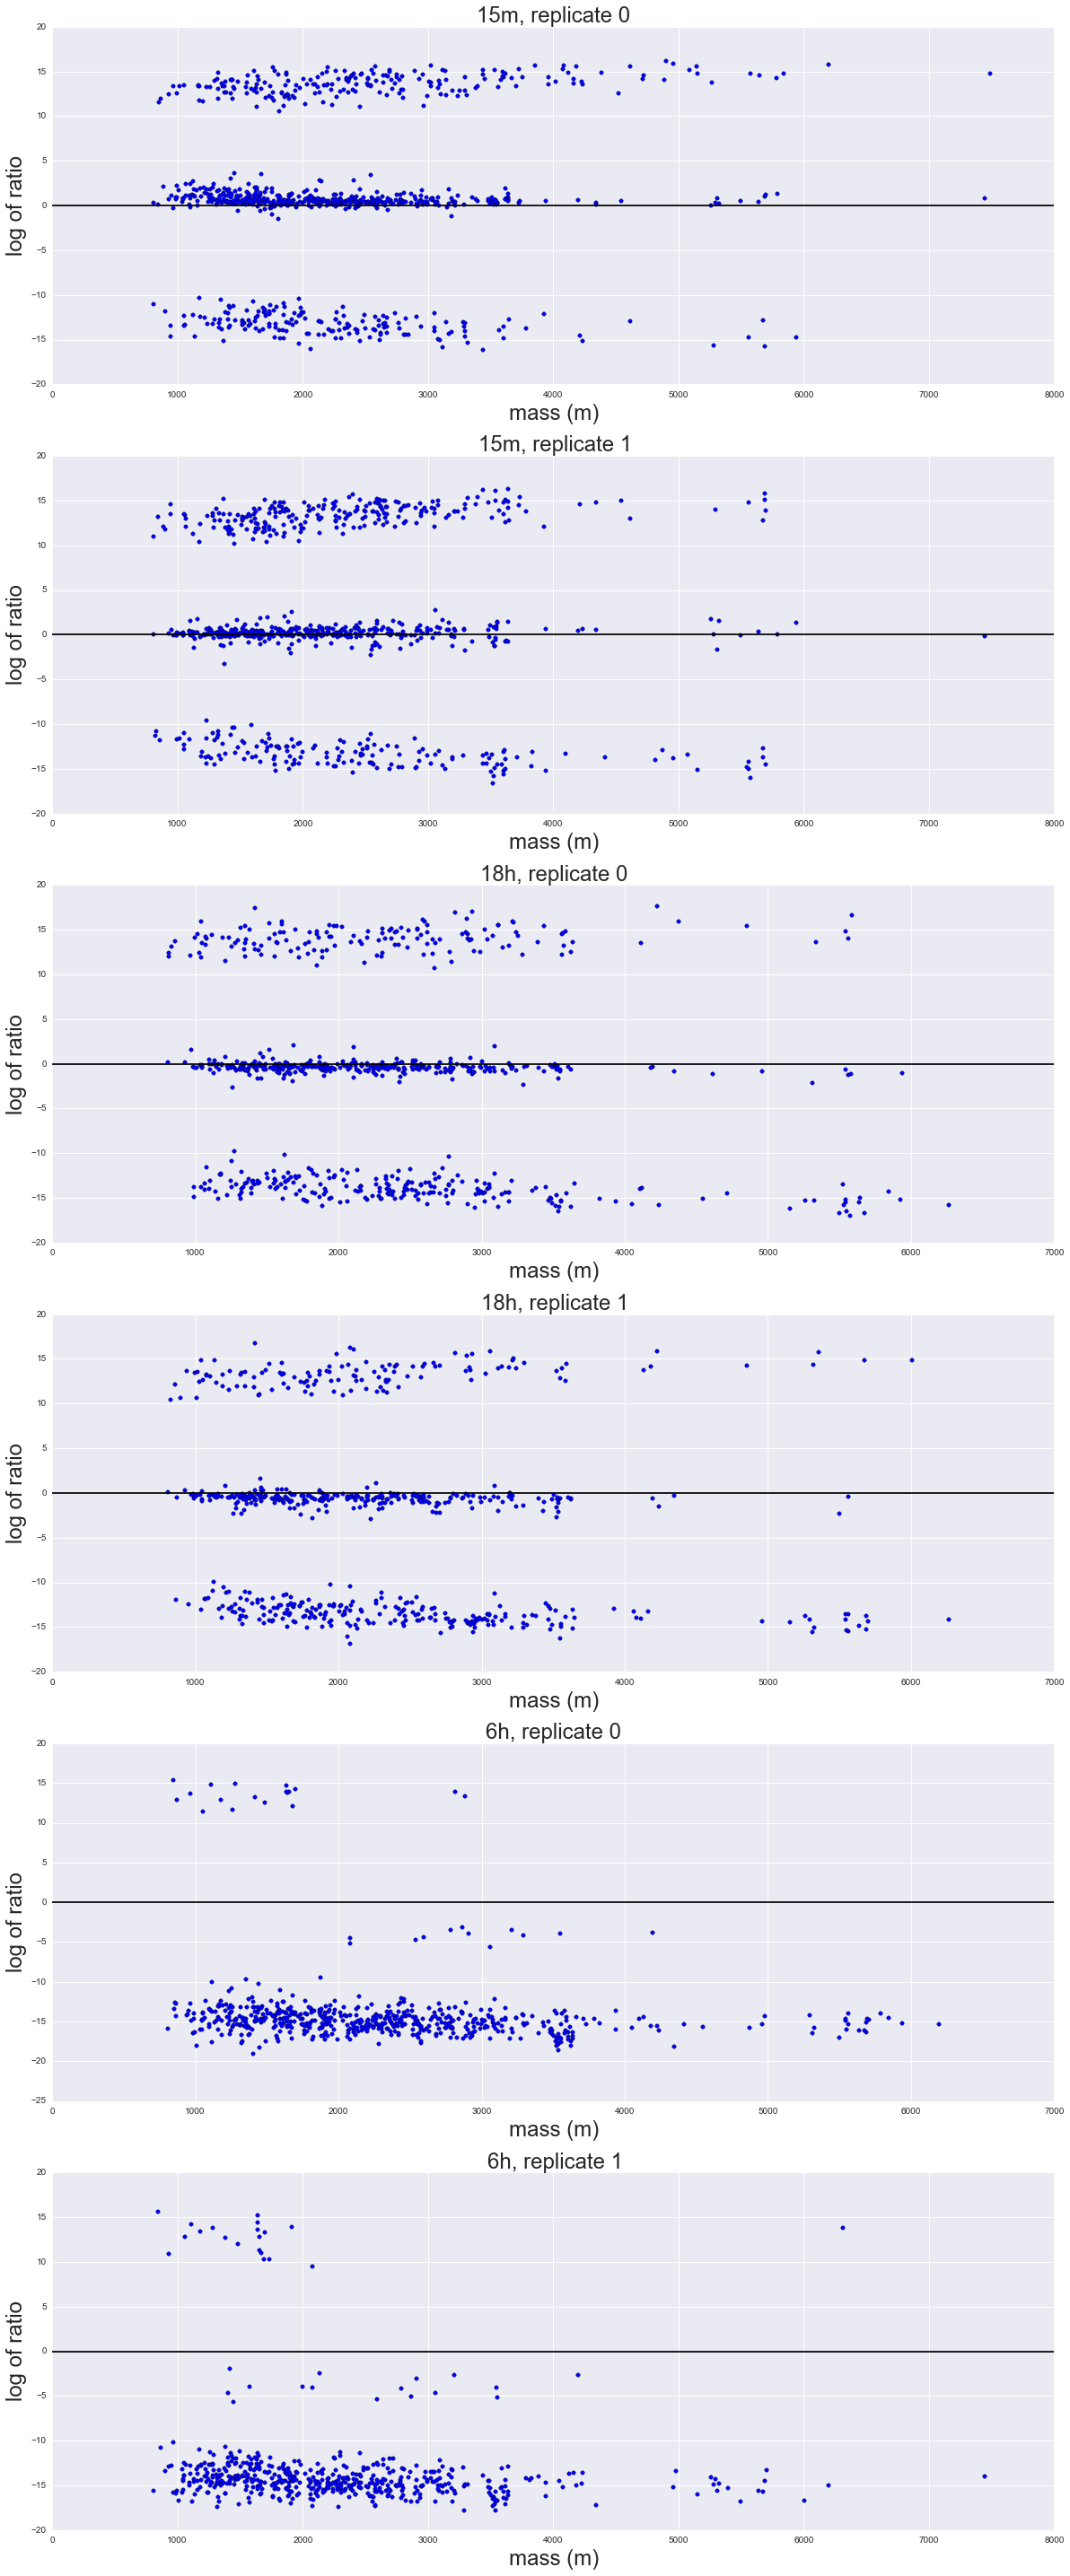

In [92]:
#plt.scatter(np.log(cp2.ix[cp3_chg.iloc[:,0].index]['m']), np.log(cp3_chg.iloc[:,0]))
#plt.title('{}, replicate {}'.format(*cp3_chg.columns[0]))
fig, axes = plt.subplots(6,1, figsize=(20, 50))
for idx in range(6):
    axes[idx].scatter(cp2.ix[cp3_chg.iloc[:,idx].index]['m'], np.log(cp3_chg.iloc[:,idx]))
    axes[idx].set_xlabel('mass (m)', fontdict = {'fontsize':24})
    axes[idx].set_ylabel('log of ratio', fontdict = {'fontsize':24})
    axes[idx].set_title('{}, replicate {}'.format(*cp3_chg.columns[idx]), fontdict = {'fontsize':24})
    axes[idx].axhline(c='black')

In [93]:
cp2.ix[cp2.loc[1,'cluster'],:-1]

,index,File Name,#,m/z,z,scan start,scan end,scan range,time,matches,...,Version,Trial,scan range (seconds),time start,time end,agg_amplitude,agg_index,cluster,cluster_file,cluster_len
0,4815,15m_anti328_0,1,558.78,2,2836,3220,385,1254,76,...,0,15m_anti328,192.50,1061.50,1446.50,58327335.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[0],11
1,2501,15m_iso_1,1,558.78,2,2411,2575,165,1235,30,...,1,15m_iso,82.50,1152.50,1317.50,14173493.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]","[1, 1659]",11
6,21325,18h_iso_1,1,558.78,2,2691,2985,295,1372,58,...,1,18h_iso,147.50,1224.50,1519.50,16094316.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[6],11
8,23513,18h_anti328_0,1,558.78,2,3226,3640,415,1359,81,...,0,18h_anti328,207.50,1151.50,1566.50,59617756.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[8],11
15,17800,18h_iso_0,1,558.78,2,3051,3445,395,1325,78,...,0,18h_iso,197.50,1127.50,1522.50,61264320.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[15],11
18,2,15m_iso_0,3,558.78,2,2621,2935,315,1362,60,...,0,15m_iso,157.50,1204.50,1519.50,17051047.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[18],11
19,8548,15m_anti328_1,3,558.78,2,2621,2935,315,1362,60,...,1,15m_anti328,157.50,1204.50,1519.50,17051047.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[19],11
26,14613,6h_iso_1,7,558.78,2,2446,2740,295,1285,54,...,1,6h_iso,147.50,1137.50,1432.50,20808348.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[26],11
33,26786,18h_anti328_1,4,558.78,2,2531,2845,315,1278,62,...,1,18h_anti328,157.50,1120.50,1435.50,13494048.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[33],11
37,11048,6h_iso_0,2,558.78,2,2936,3305,370,1299,69,...,0,6h_iso,185.00,1114.00,1484.00,42672205.00,0.00,"[0, 1, 6, 8, 15, 18, 19, 26, 33, 37, 1659]",[37],11


In [94]:
#unique rows that show up in cluster
import itertools
ab = itertools.chain(*cluster)
unique_data = set(ab)

In [95]:
#These values should be the same. slight difference, but magnitude is small enough that i'm not investigating for now

print 'amplitude filtered for unique cluster values: {}'.format(cp2.loc[unique_data]['amplitude'].sum())
print 'aggregate amplitude: {}'.format(cp2['agg_amplitude'].sum())

amplitude filtered for unique cluster values: 31383259748
aggregate amplitude: 31218764569.0


In [96]:
#aggregate cluster amplitude if it's also in the same file
cp2['amplitude']

0        58327335
1        12102745
2         5748886
3         5911379
4         4998918
5         5911379
6        16094316
7         5348056
8        59617756
9         7518733
10        7518733
11       11369067
12       56516733
13        1100293
14       10451968
15       61264320
16        6803750
17        7253337
18       17051047
19       17051047
20       14799913
21        5031963
22       53371996
23         557073
24         557073
25        1847447
26       20808348
27        3369422
28        4692050
29       12620187
           ...   
28655      119687
28656       83916
28657      166648
28658       81154
28659       82717
28660       55474
28661       92791
28662       38701
28663       90066
28664      331044
28665      254381
28666       42300
28667       13336
28668      836486
28669      261503
28670      202915
28671      277826
28672       62471
28673       16668
28674       30877
28675       38763
28676       13547
28677      166585
28678       65417
28679     

In [97]:
#cp2.ix[cp2.loc[0,'cluster'],:-1].to_excel('temp0.xlsx')
#cp2.ix[cp2.loc[1,'cluster'],:-1].to_excel('temp1.xlsx')
#cp2.ix[cp2.loc[1,'cluster']].to_excel('temp2.xlsx')

In [98]:
cp2_name = sorted(cp2['File Name'].unique())
cp2_name

[u'15m_anti328_0',
 u'15m_anti328_1',
 u'15m_iso_0',
 u'15m_iso_1',
 u'18h_anti328_0',
 u'18h_anti328_1',
 u'18h_iso_0',
 u'18h_iso_1',
 u'6h_anti328_0',
 u'6h_anti328_1',
 u'6h_iso_0',
 u'6h_iso_1']

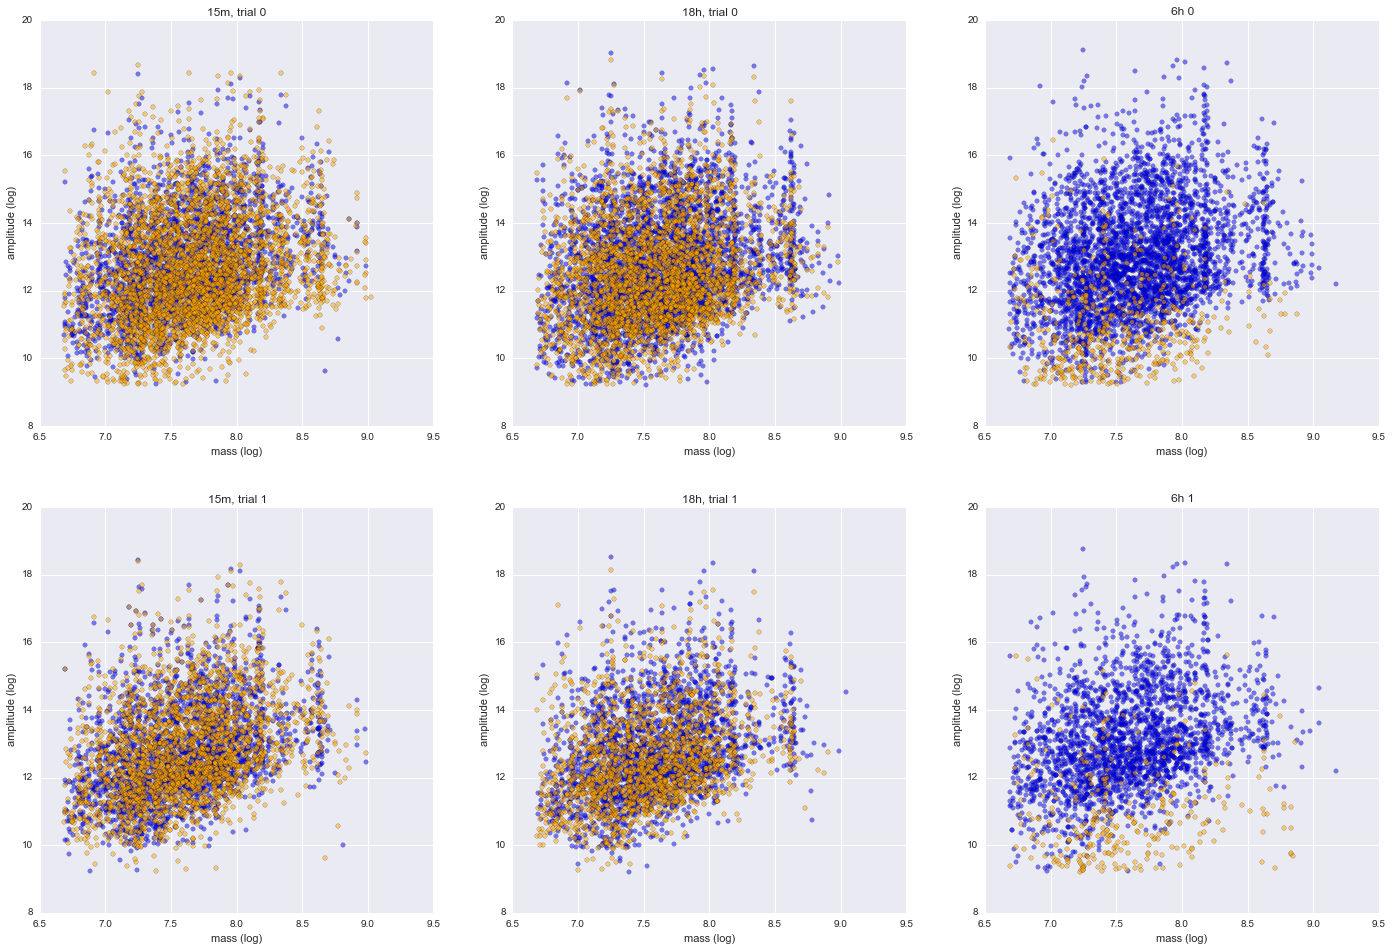

In [99]:

fig, axes = plt.subplots(2,3, figsize=(24, 16))
for idx in range(2):
    #IMPORTANT! Assumes that the cp2 name is 12 in length.
    #15 min anti versus iso
    axes[idx, 0].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['amplitude']),c='b', alpha = 0.5)
    axes[idx, 0].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx ]]['amplitude']), c='orange', alpha = 0.5)
    axes[idx, 0].set_title('15m, trial {}'.format(idx))
    axes[idx, 0].set_xlabel('mass (log)')
    axes[idx, 0].set_ylabel('amplitude (log)')
    
    #18h anti versus iso
    axes[idx, 1].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 6]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 6]]['amplitude']),c='b',alpha = 0.5)
    axes[idx, 1].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 4]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 4]]['amplitude']), c='orange',alpha = 0.5,)
    axes[idx, 1].set_title('18h, trial {}'.format(idx))
    axes[idx, 1].set_xlabel('mass (log)')
    axes[idx, 1].set_ylabel('amplitude (log)')
    
    #6h anti versus iso
    axes[idx, 2].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 10]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 10]]['amplitude']),c='b',alpha = 0.5,)
    axes[idx, 2].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 8]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 8]]['amplitude']), c='orange',alpha = 0.5,)
    axes[idx, 2].set_title('6h {}'.format(idx))
    axes[idx, 2].set_xlabel('mass (log)')
    axes[idx, 2].set_ylabel('amplitude (log)')

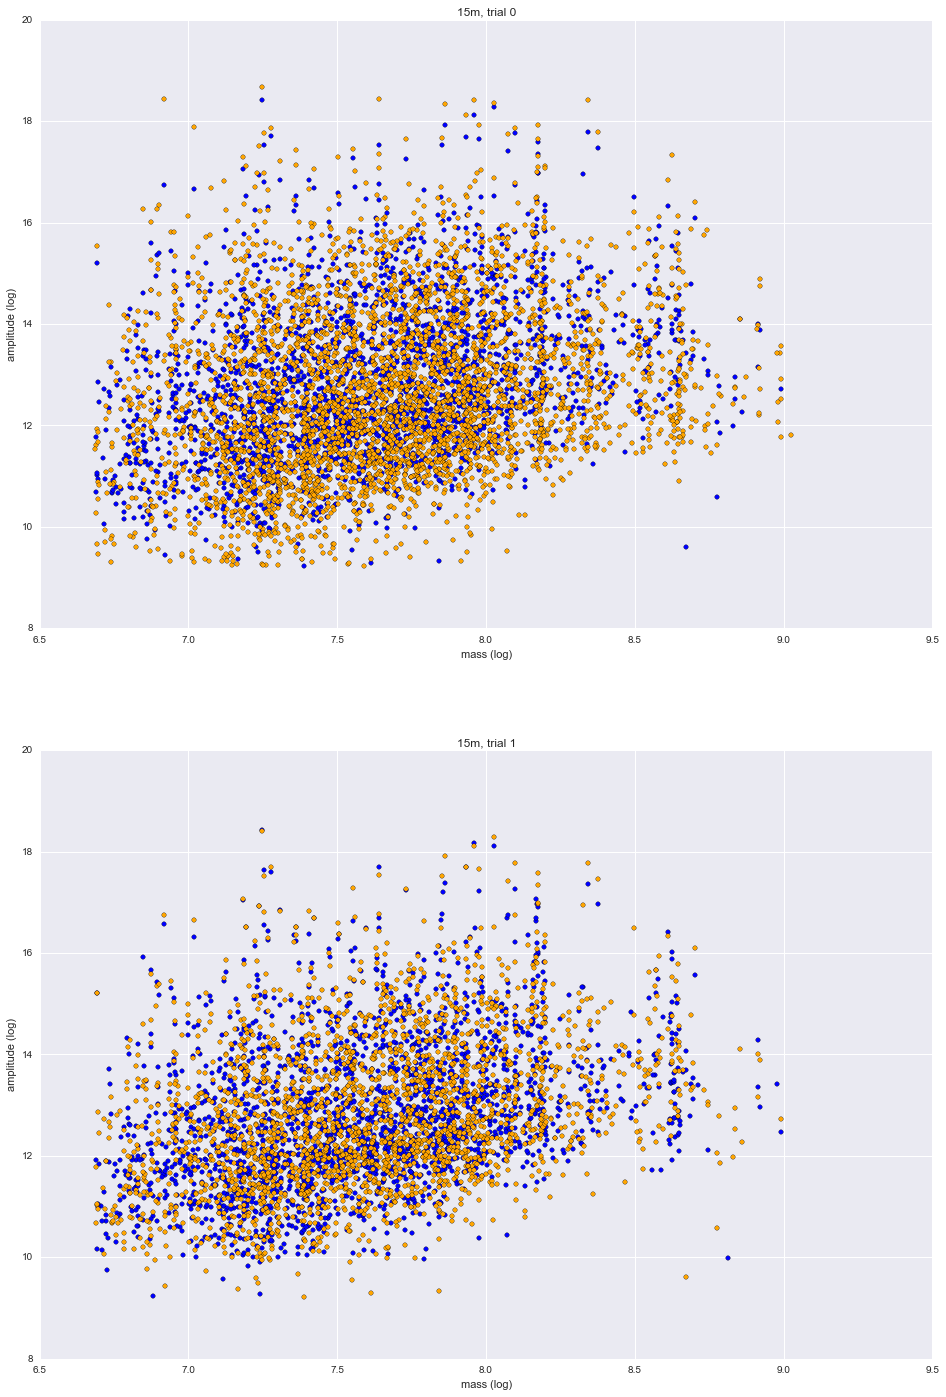

In [100]:
#full size zoom of comparison
fig, axes = plt.subplots(2,1, figsize=(16, 24))
for idx in range(2):

    axes[idx].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['amplitude']),c='b')
    axes[idx].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx ]]['amplitude']), c='orange')
    axes[idx].set_title('15m, trial {}'.format(idx))
    axes[idx].set_xlabel('mass (log)')
    axes[idx].set_ylabel('amplitude (log)')
    

In [101]:
cp2_version = sorted(cp2['Version'].unique())
cp2_version

[0, 1]

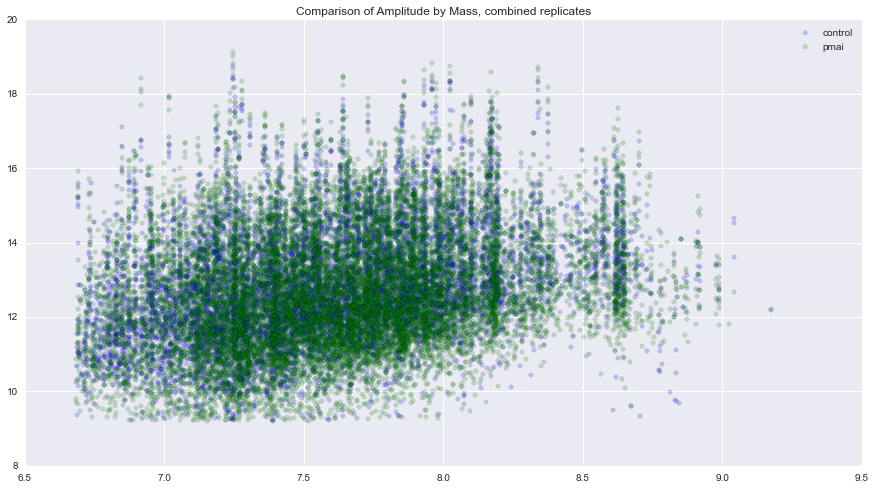

In [102]:
plt.figure(figsize=(15,8))

plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[1]]['m']), np.log(cp2[cp2['Version'] == cp2_version[1]]['amplitude']),c='b', alpha = 0.2, label = 'control')
plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[0]]['m']), np.log(cp2[cp2['Version'] == cp2_version[0]]['amplitude']), c='g', alpha = 0.2, label = 'pmai')
plt.legend()
plt.title('Comparison of Amplitude by Mass, combined replicates')